

# ML Study Jam Exercise 2

## Model Validation

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 0.5 * X + np.random.randn(100, 1)

In [ ]:
# Define polynomial degrees for different models
degrees = [1, 4, 15]

<ipython-input-7-96e10dfea467>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, len(degrees), i + 1)


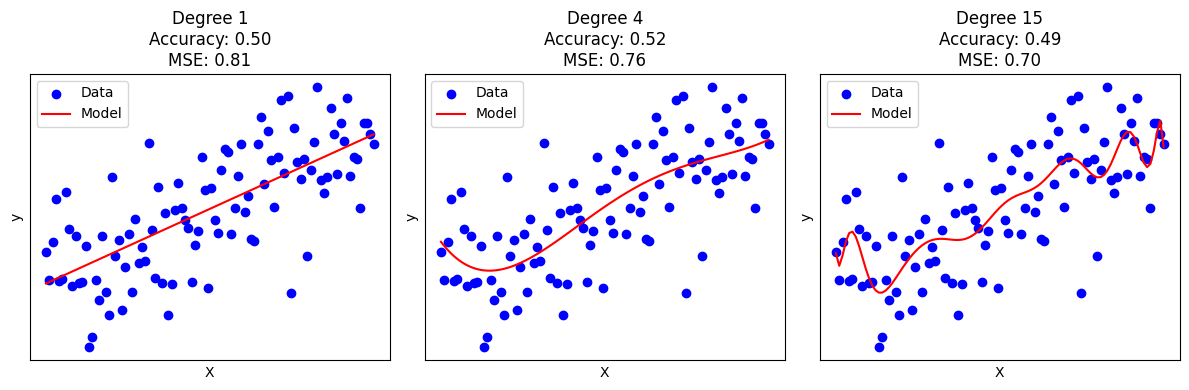

In [ ]:
# Plotting setup
plt.figure(figsize=(12, 4))
plt.scatter(X, y, color='blue', label='Data')

# Fit and plot models with different degrees
for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # %% ANSWER HERE %
    # Create polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Fit the model
    model.fit(X,y)
    # Make predictions
    y_pred = model.predict(X)

    # Plot the fitted line
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Model')
    plt.title(f'Degree {degree}\nAccuracy: {model.score(y,y_pred):.2f}\nMSE: {mean_squared_error(y, y_pred):.2f}', fontsize=12)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


#### SOLUTION

In [ ]:
# Create polynomial regression model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

## Feature Engineering

### Transform Data

In [ ]:
import pandas as pd
import numpy as np

# Create a sample dataset
data = {
    'Age': [20, 30, 25, 35, 40, 45, 50, 55, 60, 65],
    'Income': [50000, 60000, 75000, 80000, 55000, 40000, 90000, 65000, 70000, 60000],
    'Target': [0, 1, 1, 0, 1, 0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

# Print the original and modified dataframe
print("Original Dataframe:")
print(df)


# Binning the 'Age' feature into three categories: 'Young', 'Adult', 'Senior'
# %% ANSWER HERE %%
bins = [0,30,50,np.inf]
labels = ['Young', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels= labels)

# Binning the 'Income' feature into two categories based on median value
# %% ANSWER HERE %%
median_val = df['Income'].median()
df['Income_Group'] = np.where(df['Income'] <= median_val, 'Low','High' )


# Print the modified dataframe
print("Modified Dataframe:")
print(df)


Original Dataframe:
   Age  Income  Target
0   20   50000       0
1   30   60000       1
2   25   75000       1
3   35   80000       0
4   40   55000       1
5   45   40000       0
6   50   90000       0
7   55   65000       1
8   60   70000       1
9   65   60000       0
Modified Dataframe:
   Age  Income  Target Age_Group Income_Group
0   20   50000       0     Young          Low
1   30   60000       1     Young          Low
2   25   75000       1     Young         High
3   35   80000       0     Adult         High
4   40   55000       1     Adult          Low
5   45   40000       0     Adult          Low
6   50   90000       0     Adult         High
7   55   65000       1    Senior         High
8   60   70000       1    Senior         High
9   65   60000       0    Senior          Low


#### SOLUTION

In [ ]:
# Binning the 'Age' feature into three categories: 'Young', 'Adult', 'Senior'
bins = [0, 30, 50, np.inf]
labels = ['Young', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Binning the 'Income' feature into two categories based on median value
median_income = df['Income'].median()
df['Income_Group'] = np.where(df['Income'] <= median_income, 'Low', 'High')

### Create a Pipeline model

In [ ]:
# import libararies
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', LinearRegression())  # Linear regression model
])

### Non-Feature engineered model

In [ ]:
# Split the data into features and target
X = df[['Age', 'Income']]
y = df['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineered Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical features to numerical using LabelEncoder
# %% ANSWER HERE %%
le = LabelEncoder()
df['Age_Group'] = le.fit_transform(df['Age_Group'])
df['Income_Group'] = le.fit_transform(df['Income_Group'])

In [ ]:
df

,Age,Income,Target,Age_Group,Income_Group
0,20,50000,0,2,1
1,30,60000,1,2,1
2,25,75000,1,2,0
3,35,80000,0,0,0
4,40,55000,1,0,1
5,45,40000,0,0,1
6,50,90000,0,0,0
7,55,65000,1,1,0
8,60,70000,1,1,0
9,65,60000,0,1,1


In [ ]:
# Split the data into features and target
X = df[['Age_Group', 'Income_Group']]
y = df['Target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Get predictions

In [ ]:
# %% ANSWER HERE %%
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.4061543406448971


In [ ]:
# %% ANSWER HERE %%
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.27647210743801653


#### SOLUTION

In [ ]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])
df['Income_Group'] = label_encoder.fit_transform(df['Income_Group'])

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

## Importing Data from Kaggle

In [ ]:
# install kaggle libary
%pip install -q kaggle

In [ ]:
# upload Kaggle API Credentials
from google.colab import files

files.upload()

In [ ]:
# add kaggle API credentials to root
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# list kaggle datasets
! kaggle datasets list

In [ ]:
# create a new folder to save dataset
! mkdir ./kaggleDataset

# set Directory as current directory
%cd ./kaggleDataset

/content/kaggleDataset


In [ ]:
# src: https://www.kaggle.com/datasets/i191796majid/human-genetic-data

# download the dataset
# %% ANSWER HERE
! kaggle datasets download -d i191796majid/human-genetic-data

  0% 0.00/17.0k [00:00<?, ?B/s]
100% 17.0k/17.0k [00:00<00:00, 3.65MB/s]


In [ ]:
import os

# Complete path to storage location of the .zip file of data
zip_path = '/content/kaggleDataset/human-genetic-data.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly
!unzip -q 'human-genetic-data.zip'
# View the unzipped contents in the virtual machine
os.listdir()

cp: '/content/kaggleDataset/human-genetic-data.zip' and './human-genetic-data.zip' are the same file


['genetic_data_train.csv', 'genetic_data_test.csv', 'human-genetic-data.zip']

#### SOLUTION

In [ ]:
# download the dataset
! kaggle datasets download -d i191796majid/human-genetic-data

### Data Analysis

In [ ]:
import pandas as pd

data_train = pd.read_csv("/content/kaggleDataset/genetic_data_train.csv")
data_test =pd.read_csv("/content/kaggleDataset/genetic_data_test.csv")

In [ ]:
# print top 5 rows
data_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,African
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,African


In [ ]:
# print info
data_train.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.404880,2.022935,0.001913,0.102812,0.243929,0.293902,0.043762,-0.185769,0.103880,-0.041720
std,4.912770,3.486088,3.919764,3.158607,2.146196,1.775345,1.590285,1.508038,1.585749,0.979746
min,-13.319922,-6.790059,-7.682406,-5.578577,-3.738619,-3.750904,-4.658872,-4.637746,-3.805225,-0.671274
25%,1.378429,0.693607,-1.670439,-2.218318,-0.689892,-0.778750,-0.814203,-1.150829,-0.961702,-0.671274
50%,3.078680,2.891455,-0.216789,-0.158435,0.104254,0.166350,0.087942,-0.179818,0.127011,-0.671274
75%,4.306548,4.258144,1.274309,3.276286,0.782704,1.127730,0.975648,0.733770,1.233731,0.885596
max,5.811956,7.582173,8.938295,5.892653,13.195087,6.004057,5.140476,3.908339,3.739434,2.442467


In [ ]:
# Check the number of smples and features
print("Number of samples:", data_train.shape[0])
print("Number of features:", data_train.shape[1])

Number of samples: 183
Number of features: 11


In [ ]:
# Check the available ancestral categories
print("Available ancestral categories:", data_train["Ancestry"].unique())

Available ancestral categories: ['African' 'European' 'EastAsian' 'Oceanian' 'NativeAmerican']


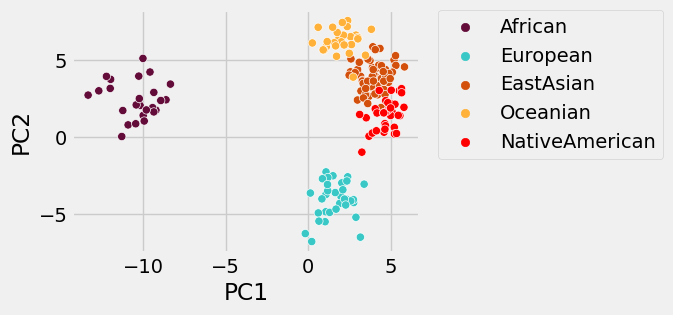

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the figure
plt.style.use('fivethirtyeight')

# Define a custom palette
custom_palette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139', '#FF0000']

# Set the figure size
plt.figure(figsize=(4, 3))

# Create a scatter plot of the first two principal components
sns.scatterplot(x="PC1", y="PC2", hue="Ancestry", data=data_train, palette=custom_palette)

# Set x and y axes labels
plt.xlabel("PC1")
plt.ylabel("PC2")

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

# Show the plot
plt.show()

In [ ]:
# Create a scatter plot of the principal component values PC1 vs all the other PCs for different ancestral categories

for i in range(2,11):
  # Set the style of the figure
  plt.style.use('fivethirtyeight')

  # Set the figure size
  plt.figure(figsize=(4, 3))

  # Create a scatter plot of the first two principal components
  sns.scatterplot(x="PC1", y="PC"+str(i), hue="Ancestry", data=data_train, palette=custom_palette)

  # Set x and y axes labels
  plt.xlabel("PC1")
  plt.ylabel("PC"+str(i))

  # Show the legend
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

  # Show the plot
  plt.show()


In [ ]:
# Plot correlation as a heatmap

# %% ANSWER HERE
f, ax= plt.subplot(figsize=(5,5))
sns.heatmap(data_train.corr(), annot=True, ax=ax)
plt.show()

AttributeError: ignored

<Figure size 640x480 with 0 Axes>

In [ ]:
# Scale the principal component values
# %% ANSWER HERE

# Encode the categorical ancestral labels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_train['Ancestry'] = encoder.fit_transform(data_train['Ancestry'])
data_test['Ancestry'] = encoder.fit_transform(data_test['Ancestry'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Separate features and target variable for training set
X_train = data_train.iloc[:, :-1]  # Features (principal components)
y_train = data_train.iloc[:, -1]  # Target variable (ancestry labels)

# Separate features for test set
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

# Apply feature scaling to the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model (parameter use l1 regularization, large dataset handling, multi class support)
# %% ANSWER HERE %%

In [ ]:
# Print feature coefficients
feature_names = X_train.columns
coefficients = model.coef_

for feature, coef in zip(feature_names, coefficients[0]):
    print(f'{feature}: {coef}')

In [ ]:
# Evaluate the model on the test set
accuracy = model.score(X_test_scaled, y_test)
print("Test Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix

# Perform ancestry prediction on the test set
y_pred = model.predict(X_test)

# Get all unique labels from training set and test set
all_labels = sorted(set(y_train.unique()) | set(y_test.unique()))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=all_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Ancestry')
plt.ylabel('True Ancestry')
plt.title('Confusion Matrix')
plt.show()

#### SOLUTION

In [ ]:
# Plot correlation as a heatmap

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data_train.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [ ]:
# Scale the principal component values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_train['PC1'] = scaler.fit_transform(data_train['PC1'].values.reshape(-1, 1))
data_train['PC2'] = scaler.fit_transform(data_train['PC2'].values.reshape(-1, 1))

In [ ]:
# Train the logistic regression model
model = LogisticRegression(penalty='l1', solver='saga', multi_class='multinomial')
model.fit(X_train_scaled, y_train)

## Deep Learning

In [ ]:
# import libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# explore the dataset
print("Number of training examples:", x_train.shape[0])
print("Number of test examples:", x_test.shape[0])

Number of training examples: 60000
Number of test examples: 10000


In [ ]:
import matplotlib.pyplot as plt

# visualize the training example
# %%ANSWER HERE %%

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# Reshape and normalize the input data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

In [ ]:
# Convert the labels to one-hot encoded vectors
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
# Create the deep learning model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 21ms/step - loss: 0.4614 - accuracy: 0.8593 - val_loss: 0.1590 - val_accuracy: 0.9508
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2174 - accuracy: 0.9359 - val_loss: 0.1129 - val_accuracy: 0.9664
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1671 - accuracy: 0.9499 - val_loss: 0.0983 - val_accuracy: 0.9698
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1474 - accuracy: 0.9557 - val_loss: 0.0895 - val_accuracy: 0.9721
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1286 - accuracy: 0.9611 - val_loss: 0.0782 - val_accuracy: 0.9762
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1183 - accuracy: 0.9641 - val_loss: 0.0781 - val_accuracy: 0.9770
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1074 - accuracy: 0.9672 - val_loss: 0.0783 - val_accuracy: 0.977

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0752 - accuracy: 0.9777
Test Loss: 0.07522449642419815
Test Accuracy: 0.9776999950408936


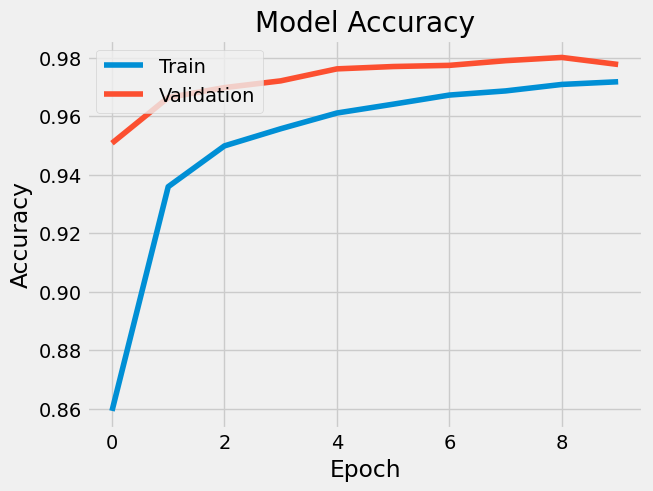

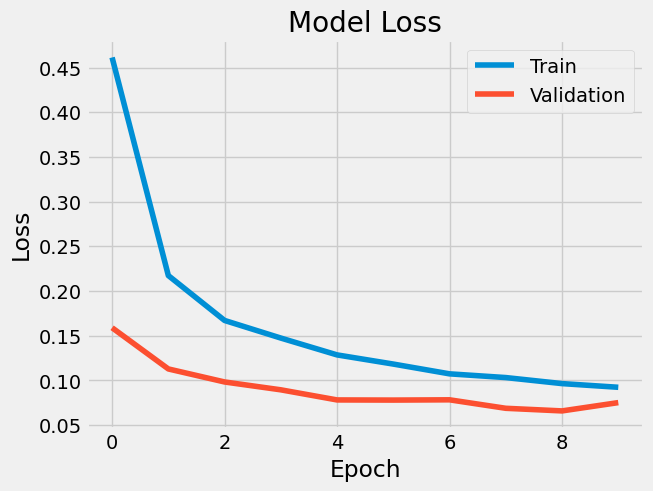

In [ ]:
# use history object to plot the training and validation accuracy for each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# use history object to plot the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### SOLUTION

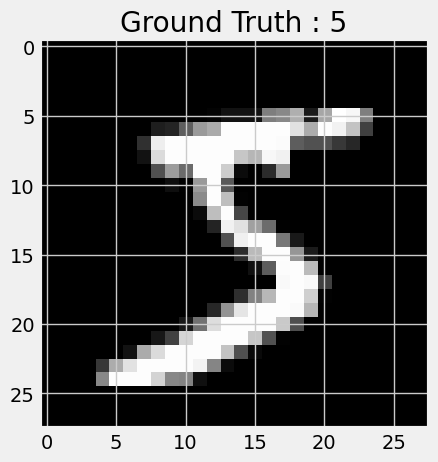

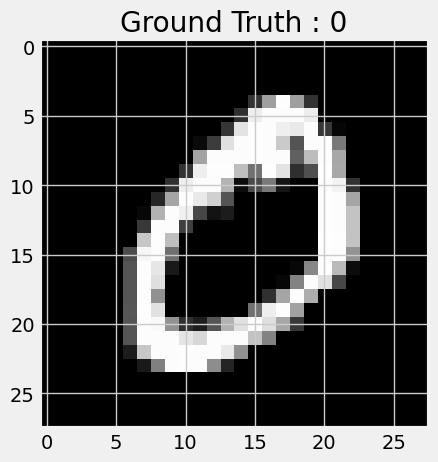

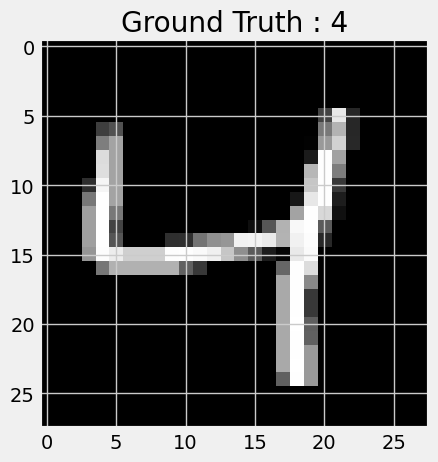

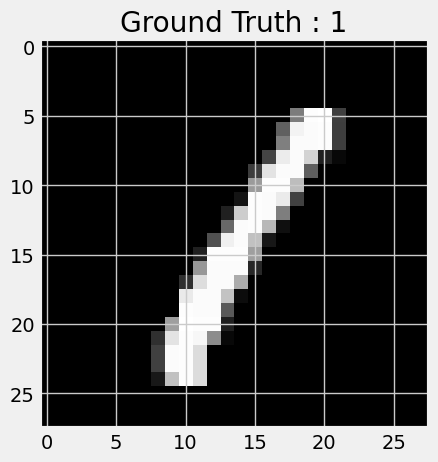

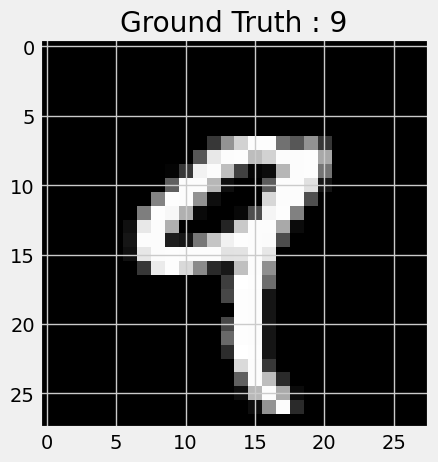

In [ ]:
# visualize the training example

for i in range(0,5):
  plt.imshow(x_train[i], cmap='gray')
  plt.title('Ground Truth : {}'.format(y_train[i]))
  plt.show()